Applying Cross-Validation to Random Forest Classifier
Exercise: Implement a random forest classifier and evaluate the model using k-fold cross-validation. Analyze the cross-validation scores to assess model stability.

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

data = pd.read_csv('adult.csv')

data = data.dropna()

categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

le = LabelEncoder()

for column in categorical_columns:
    data[column] = le.fit_transform(data[column])

X = data.drop('income', axis=1)

y = data['income']

rf_classifier = RandomForestClassifier(random_state=42)

k = 10  
cv_scores = cross_val_score(rf_classifier, X, y, cv=k)

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {np.mean(cv_scores)}")
print(f"Standard deviation of CV scores: {np.std(cv_scores)}")


Cross-validation scores: [0.84892528 0.85547595 0.85626536 0.85687961 0.85831286 0.85524161
 0.86015561 0.85708436 0.86240786 0.85790336]
Mean CV score: 0.8568651842500359
Standard deviation of CV scores: 0.0033576454925066932


Investigating Overfitting and Underfitting in Gradient Boosting Machines
Exercise: Train a gradient boosting classifier with varying numbers of estimators and learning rates. Evaluate the model for overfitting and underfitting by comparing training and validation performance.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

n_estimators_list = [50, 100, 200]
learning_rate_list = [0.01, 0.1, 0.2]

results = {}

for n_estimators in n_estimators_list:
    for learning_rate in learning_rate_list:
        gb_classifier = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)

        gb_classifier.fit(X_train, y_train)

        y_train_pred = gb_classifier.predict(X_train)

        y_val_pred = gb_classifier.predict(X_val)

        train_accuracy = accuracy_score(y_train, y_train_pred)
        val_accuracy = accuracy_score(y_val, y_val_pred)
        results[(n_estimators, learning_rate)] = (train_accuracy, val_accuracy)

for params, (train_acc, val_acc) in results.items():
    n_estimators, learning_rate = params
    print(f"n_estimators: {n_estimators}, learning_rate: {learning_rate} -> Train Accuracy: {train_acc}, Validation Accuracy: {val_acc}")


n_estimators: 50, learning_rate: 0.01 -> Train Accuracy: 0.8028561922555217, Validation Accuracy: 0.8101136247312929
n_estimators: 50, learning_rate: 0.1 -> Train Accuracy: 0.8597752924014025, Validation Accuracy: 0.8645716040536391
n_estimators: 50, learning_rate: 0.2 -> Train Accuracy: 0.8667110280756533, Validation Accuracy: 0.8713276691575391
n_estimators: 100, learning_rate: 0.01 -> Train Accuracy: 0.8405804519745093, Validation Accuracy: 0.8468625243115979
n_estimators: 100, learning_rate: 0.1 -> Train Accuracy: 0.8671972973664679, Validation Accuracy: 0.8735796908588391
n_estimators: 100, learning_rate: 0.2 -> Train Accuracy: 0.874849640416656, Validation Accuracy: 0.8780837342614393
n_estimators: 200, learning_rate: 0.01 -> Train Accuracy: 0.8477465257338828, Validation Accuracy: 0.8519807554509161
n_estimators: 200, learning_rate: 0.1 -> Train Accuracy: 0.8746193023315333, Validation Accuracy: 0.8784931927525848
n_estimators: 200, learning_rate: 0.2 -> Train Accuracy: 0.881478

Evaluating Precision, Recall, and F1-Score for Random Forests
Exercise: Implement a random forest classifier and calculate precision, recall, and F1-score. Discuss the trade-offs between these metrics and their importance for classification tasks.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

precision = precision_score(y_test, y_pred, pos_label=le.transform(['>50K'])[0])
recall = recall_score(y_test, y_pred, pos_label=le.transform(['>50K'])[0])
f1 = f1_score(y_test, y_pred, pos_label=le.transform(['>50K'])[0])

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Precision: 0.7423096318709027
Recall: 0.6427947598253275
F1-Score: 0.6889772993213199


ROC Curve and AUC for Gradient Boosting Classifier
Exercise: Implement a gradient boosting classifier and plot the ROC curve. Compute the AUC and interpret how well the model distinguishes between classes

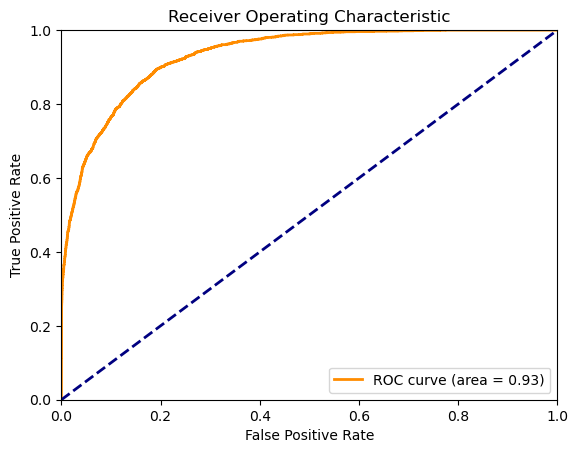

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_prob = gb_classifier.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


Model Performance Comparison with Different Metrics
Exercise: Compare the performance of different classifiers (e.g., SVM, random forest, gradient boosting) using cross-validation. Evaluate and compare the models based on accuracy, precision, recall, F1-score, and ROC-AUC.

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score

classifiers = {
    'SVM': SVC(probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True)
}

results = {}

for name, clf in classifiers.items():
    results[name] = {}
    for score_name, score_func in scoring.items():
        score = cross_val_score(clf, X, y, cv=skf, scoring=score_func)
        results[name][score_name] = score.mean()

for name, metrics in results.items():
    print(f"Classifier: {name}")
    for metric_name, metric_value in metrics.items():
        print(f"  {metric_name}: {metric_value:.4f}")
    print("\n")
